# 기존에 마운트된 드라이브 해제

In [ ]:
# 드라이브 마운트 해제
from google.colab import drive
drive.flush_and_unmount()

# Google Drive 마운트 절차

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# 마운트된 드라이브의 파일 목록 확인
!ls /content/drive/MyDrive

'Colab Notebooks'   fruit_image_dataset
 fruit_dataset	    fruits-fresh-and-rotten-for-classification.zip


# 1. 데이터셋 다운로드 & 업로드
> kaggle에서 'Fruits fresh and rotten for classification' 데이터셋 다운로드

In [ ]:
# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# kaggle 라이브러리 설치
!pip install kaggle

# kaggle
from google.colab import files
files.upload() # kaggle.json 파일 업로드

# kaggle 디렉토리 생성 & 인증 파일 이동
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Google Drive에 데이터셋 저장 경로 설정
drive_dataset_path = '/content/drive/MyDrive/fruit_image_dataset'

# Kaggle 데이터셋 다운로드 (Google Drive에 저장)
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification -p /content/drive/MyDrive

# 다운로드한 데이터셋 압축 해제 (Google Drive에 저장)
!unzip /content/drive/MyDrive/fruits-fresh-and-rotten-for-classification.zip -d {drive_dataset_path}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/drive/MyDrive/fruit_image_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: /content/drive/MyDrive/fruit_image_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: /content/drive/MyDrive/fruit_image_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: /content/drive/MyDrive/fruit_image_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: /content/drive/MyDrive/fruit_image_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: /content/drive/MyDrive/fruit_image_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: /content/drive/MyDrive/fruit_image_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3

## 불필요한 폴더 삭제

In [ ]:
!rm -r /content/drive/MyDrive/fruit_image_dataset/dataset/dataset

# 2. 데이터셋 분할
학습 데이터셋(train)의 각 클래스 폴더에서 이미지 데이터의 20%를 검증 데이터셋(validation)으로 분할하여 검증 데이터셋 제작

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# 데이터셋 경로 설정 (Google Drive 경로로 변경)
dataset_path = '/content/drive/MyDrive/fruit_image_dataset/dataset'
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')

# 클래스 폴더 목록
class_folders = ['fresh apple', 'fresh banana', 'fresh orange', 'rotten apple', 'rotten banana', 'rotten orange']

# 각 클래스 폴더별로 이미지를 분할
for class_folder in class_folders:
    class_train_dir = os.path.join(train_dir, class_folder)
    class_val_dir = os.path.join(val_dir, class_folder)

    # 클래스 폴더 내의 이미지 파일 경로 리스트 생성
    images = [os.path.join(class_train_dir, img) for img in os.listdir(class_train_dir)]

    # 학습 데이터와 검증 데이터로 분할
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # 검증 데이터 디렉토리 생성
    os.makedirs(class_val_dir, exist_ok=True)

    # 검증 데이터 이동
    for img in val_images:
        shutil.move(img, class_val_dir)

print("Validation data has been successfully split and moved.")

Validation data has been successfully split and moved.


## 데이터셋 분할 완료 확인

* **Train data : 각 75장의 이미지 & JSON 형식의 어노테이션 파일**
* **Validation data : 각 25장의 이미지 & JSON 형식의 어노테이션 파일**

In [3]:
import os

# 디렉토리 경로 설정
train_dir = '/content/drive/MyDrive/fruit_image_dataset/dataset/train'
val_dir = '/content/drive/MyDrive/fruit_image_dataset/dataset/val'

# 어노테이션 파일 및 이미지 파일 검사
def count_files(directory):
    num_images = 0
    num_annotations = 0
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            num_annotations += 1
        else:
            num_images += 1
    return num_images, num_annotations

# Train 데이터 출력
print("Train data:")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images, num_annotations = count_files(class_path)
        print(f"{class_name}: {num_images} images, {num_annotations} annotation file")

# Validation 데이터 출력
print("\nValidation data:")
for class_name in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_name)
    if os.path.isdir(class_path):
        num_images, num_annotations = count_files(class_path)
        print(f"{class_name}: {num_images} images, {num_annotations} annotation file")

Train data:
fresh orange: 75 images, 1 annotation file
rotten orange: 75 images, 1 annotation file
rotten banana: 75 images, 1 annotation file
rotten apple: 75 images, 1 annotation file
fresh apple: 75 images, 1 annotation file
fresh banana: 75 images, 1 annotation file

Validation data:
rotten apple: 25 images, 1 annotation file
rotten banana: 25 images, 1 annotation file
fresh banana: 25 images, 1 annotation file
fresh orange: 25 images, 1 annotation file
fresh apple: 25 images, 1 annotation file
rotten orange: 25 images, 1 annotation file


# **1. EfficientDet-D0 모델** 세팅 및 모델 학습 process(kaggle 데이터셋 사용)
---
EfficientDet 모델은 D0부터 D7 모델까지 있고, 뒤로 갈수록 모델의 크기와 복잡도가 큼.
먼저 **EfficientDet-D0 모델**을 써보기로 함

* 이미지 크기(img size) : 512x512
* 배치 크기(batch size) : 32(평균과 표준편차를 계산할땐 64로 설정)
* 에포크(ephochs) : 50

## **1.1 필요한 라이브러리 설치 & 임포트**

In [1]:
!pip install effdet
import torch
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import json
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau

### **1.1.1 GPU 사용 가능 여부 확인 & 사용중인 GPU 이름 확인**

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA A100-SXM4-40GB


## **1.2 어노테이션 도구를 사용하여 이미지 데이터에 대한 JSON 형식의 어노테이션 파일 생성하기**

**VGG Image Annotator** : https://www.robots.ox.ac.uk/~vgg/software/via/

## **1.3 이미지 리사이즈 & 패딩 작업 수행 및 원본 이미지 어노테이션 파일 조정**

In [ ]:
# 작업에 필요한 라이브러리 임포트
# import os
# import json
# import cv2
# import numpy as np

# 원본 이미지와 어노테이션이 있는 디렉토리
base_dir = '/content/drive/MyDrive/fruit_image_dataset/dataset'
# 조정된 이미지와 어노테이션을 저장할 디렉토리
output_base_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset'
output_size = (512, 512)

def resize_and_pad(image, desired_size):
    old_size = image.shape[:2]  # old_size is in (height, width) format
    ratio = float(desired_size[0]) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])

    image = cv2.resize(image, (new_size[1], new_size[0]))

    delta_w = desired_size[1] - new_size[1]
    delta_h = desired_size[0] - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]
    new_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

    return new_image, ratio, left, top

def adjust_annotations(annotation_path, image_folder, output_folder):
    with open(annotation_path, 'r') as f:
        annotations = json.load(f)

    adjusted_annotations = {}
    for key, value in annotations.items():
        image_path = os.path.join(image_folder, value['filename'])
        image = cv2.imread(image_path)
        if image is None:
            print(f"Image {value['filename']} not found or cannot be read.")
            continue

        new_image, ratio, left, top = resize_and_pad(image, output_size)
        new_image_filename = f"resized_{value['filename']}"
        new_image_path = os.path.join(output_folder, new_image_filename)
        cv2.imwrite(new_image_path, new_image)
        print(f"Saved resized image to {new_image_path}")

        image_key = new_image_filename
        objects = []
        for region_id, region in value.get('regions', {}).items():
            shape_attr = region['shape_attributes']
            x = shape_attr['x']
            y = shape_attr['y']
            width = shape_attr['width']
            height = shape_attr['height']

            new_x_min = int(x * ratio + left)
            new_y_min = int(y * ratio + top)
            new_x_max = new_x_min + int(width * ratio)
            new_y_max = new_y_min + int(height * ratio)

            label = region['region_attributes'].get('class', '')
            status = 'fresh' if 'fresh' in label else 'rotten'

            object_info = {
                'label': label.split()[1],  # 과일 이름 추출 (예: 'apple')
                'status': status,
                'bbox': [new_x_min, new_y_min, new_x_max, new_y_max]
            }
            objects.append(object_info)

        adjusted_annotations[image_key] = {
            'size': [output_size[1], output_size[0]],
            'objects': objects
        }

    adjusted_annotation_path = os.path.join(output_folder, os.path.basename(annotation_path))
    with open(adjusted_annotation_path, 'w') as f:
        json.dump(adjusted_annotations, f, indent=2)
    print(f"Saved adjusted annotation to {adjusted_annotation_path}")

def process_dataset(base_dir, output_base_dir):
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(base_dir, split)
        output_split_dir = os.path.join(output_base_dir, split)
        os.makedirs(output_split_dir, exist_ok=True)

        if not os.path.isdir(split_dir):
            print(f"Directory {split_dir} does not exist.")
            continue

        for category in os.listdir(split_dir):
            category_dir = os.path.join(split_dir, category)
            output_category_dir = os.path.join(output_split_dir, category)
            os.makedirs(output_category_dir, exist_ok=True)

            if not os.path.isdir(category_dir):
                print(f"Category directory {category_dir} does not exist.")
                continue

            annotation_file = os.path.join(category_dir, f"{category.replace(' ', '_').lower()}_{split}_annotation.json")
            if os.path.isfile(annotation_file):
                print(f"Processing {annotation_file}...")
                adjust_annotations(annotation_file, category_dir, output_category_dir)
            else:
                print(f"Annotation file {annotation_file} does not exist.")

# 실행
process_dataset(base_dir, output_base_dir)

Processing /content/drive/MyDrive/fruit_image_dataset/dataset/train/fresh apple/fresh_apple_train_annotation.json...
Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/resized_Screen Shot 2018-06-08 at 4.59.49 PM.png
Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/resized_Screen Shot 2018-06-08 at 4.59.57 PM.png
Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/resized_Screen Shot 2018-06-08 at 5.00.03 PM.png
Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/resized_Screen Shot 2018-06-08 at 5.02.08 PM.png
Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/resized_Screen Shot 2018-06-08 at 5.02.31 PM.png
Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/resized_Screen Shot 2018-06-08 a

### **1.3.1 test 데이터에 대한 이미지 리사이즈 & 패딩 작업 수행**

In [ ]:
# 원본 이미지와 어노테이션이 있는 디렉토리
base_dir = '/content/drive/MyDrive/fruit_image_dataset/dataset'
# 조정된 이미지와 어노테이션을 저장할 디렉토리
output_base_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset'
output_size = (512, 512)

def resize_and_pad(image, desired_size):
    old_size = image.shape[:2]  # old_size is in (height, width) format
    ratio = float(desired_size[0]) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])

    image = cv2.resize(image, (new_size[1], new_size[0]))

    delta_w = desired_size[1] - new_size[1]
    delta_h = desired_size[0] - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]
    new_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

    return new_image

def process_test_images(base_dir, output_base_dir):
    test_dir = os.path.join(base_dir, 'test')
    output_test_dir = os.path.join(output_base_dir, 'test')
    os.makedirs(output_test_dir, exist_ok=True)

    if not os.path.isdir(test_dir):
        print(f"Directory {test_dir} does not exist.")
        return

    for category in os.listdir(test_dir):
        category_dir = os.path.join(test_dir, category)
        output_category_dir = os.path.join(output_test_dir, category)

        if not os.path.isdir(category_dir):
            print(f"Category directory {category_dir} does not exist.")
            continue

        # 생성된 디렉토리가 없는 경우에만 생성
        if not os.path.exists(output_category_dir):
            os.makedirs(output_category_dir)

        for image_name in os.listdir(category_dir):
            image_path = os.path.join(category_dir, image_name)
            image = cv2.imread(image_path)
            if image is None:
                print(f"Image {image_name} not found or cannot be read.")
                continue

            new_image = resize_and_pad(image, output_size)
            new_image_filename = f"resized_{image_name}"
            new_image_path = os.path.join(output_category_dir, new_image_filename)
            cv2.imwrite(new_image_path, new_image)
            print(f"Saved resized image to {new_image_path}")

# 실행
process_test_images(base_dir, output_base_dir)

Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten orange/resized_Screen Shot 2018-06-12 at 11.18.34 PM.png
Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten orange/resized_Screen Shot 2018-06-12 at 11.19.01 PM.png
Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten orange/resized_Screen Shot 2018-06-12 at 11.23.33 PM.png
Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten orange/resized_Screen Shot 2018-06-12 at 11.18.53 PM.png
Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten orange/resized_Screen Shot 2018-06-12 at 11.21.54 PM.png
Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten orange/resized_Screen Shot 2018-06-12 at 11.20.05 PM.png
Saved resized image to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/

### **1.3.2 JSON 형식의 어노테이션 파일들을 COCO 형식으로 변환하여 각 폴더 안에 저장**
* *EfficientDet 모델은 COCO 형식의 어노테이션 파일로 학습하기에 JSON 파일 형식을 COCO 형식으로 변환해야 함*

#### **1.3.2.1 train과 val 데이터들의 어노테이션 파일 변환**

In [ ]:
import json
import os

def convert_to_coco_format(input_dir):
    categories = {
        "fresh apple": 1,
        "rotten apple": 2,
        "fresh banana": 3,
        "rotten banana": 4,
        "fresh orange": 5,
        "rotten orange": 6
    }

    for phase in ['train', 'val']:
        phase_dir = os.path.join(input_dir, phase)
        for category_name, category_id in categories.items():
            category_dir = os.path.join(phase_dir, category_name)
            annotation_file = os.path.join(category_dir, f'{category_name.replace(" ", "_")}_{phase}_annotation.json')

            coco_format = {
                "images": [],
                "annotations": [],
                "categories": []
            }

            coco_format["categories"].append({
                "id": category_id,
                "name": category_name
            })

            annotation_id = 1
            image_id = 1

            if not os.path.exists(annotation_file):
                print(f"File not found: {annotation_file}")
                continue

            with open(annotation_file, 'r') as f:
                data = json.load(f)

            for image_name, image_info in data.items():
                coco_format["images"].append({
                    "id": image_id,
                    "file_name": image_name,
                    "width": image_info["size"][0],
                    "height": image_info["size"][1]
                })

                for obj in image_info["objects"]:
                    bbox = obj["bbox"]
                    category_full_name = f"{obj['status']} {obj['label']}"
                    coco_format["annotations"].append({
                        "id": annotation_id,
                        "image_id": image_id,
                        "category_id": categories[category_full_name],
                        "bbox": bbox,
                        "area": bbox[2] * bbox[3],
                        "iscrowd": 0
                    })
                    annotation_id += 1

                image_id += 1

            output_file = os.path.join(category_dir, f'{category_name.replace(" ", "_")}_{phase}_annotation_coco.json')
            with open(output_file, 'w') as f:
                json.dump(coco_format, f, indent=4)
            print(f"Saved COCO format annotation to {output_file}")

# 사용 예시
input_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset'
convert_to_coco_format(input_dir)

Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/fresh_apple_train_annotation_coco.json
Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten apple/rotten_apple_train_annotation_coco.json
Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh banana/fresh_banana_train_annotation_coco.json
Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten banana/rotten_banana_train_annotation_coco.json
Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh orange/fresh_orange_train_annotation_coco.json
Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten orange/rotten_orange_train_annotation_coco.json
Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/

#### **1.3.2.2 test 데이터들의 어노테이션 파일 변환**

In [ ]:
import os
import json

def convert_test_annotations_to_coco(test_dir):
    categories = {
        "fresh apple": 1,
        "rotten apple": 2,
        "fresh banana": 3,
        "rotten banana": 4,
        "fresh orange": 5,
        "rotten orange": 6
    }

    for category_name, category_id in categories.items():
        category_dir = os.path.join(test_dir, category_name)
        annotation_file = os.path.join(category_dir, f'{category_name.replace(" ", "_")}_test_annotation.json')

        coco_format = {
            "images": [],
            "annotations": [],
            "categories": []
        }

        # 카테고리 추가
        coco_format["categories"].append({
            "id": category_id,
            "name": category_name,
        })

        annotation_id = 1
        image_id = 1

        if not os.path.exists(annotation_file):
            print(f"File not found: {annotation_file}")
            continue

        with open(annotation_file, 'r') as f:
            data = json.load(f)

        for image_key, image_info in data.items():
            coco_format["images"].append({
                "id": image_id,
                "file_name": image_info["filename"],
                "width": image_info["regions"]["0"]["shape_attributes"]["width"],
                "height": image_info["regions"]["0"]["shape_attributes"]["height"]
            })

            bbox = [
                image_info["regions"]["0"]["shape_attributes"]["x"],
                image_info["regions"]["0"]["shape_attributes"]["y"],
                image_info["regions"]["0"]["shape_attributes"]["width"],
                image_info["regions"]["0"]["shape_attributes"]["height"]
            ]

            coco_format["annotations"].append({
                "id": annotation_id,
                "image_id": image_id,
                "category_id": category_id,
                "bbox": bbox,
                "area": bbox[2] * bbox[3],
                "iscrowd": 0
            })

            annotation_id += 1
            image_id += 1

        output_file = os.path.join(category_dir, f'{category_name.replace(" ", "_")}_test_annotation_coco.json')
        with open(output_file, 'w') as f:
            json.dump(coco_format, f, indent=4)
        print(f"Saved COCO format annotation to {output_file}")

# 사용 예시
test_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test'
convert_test_annotations_to_coco(test_dir)

Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/fresh apple/fresh_apple_test_annotation_coco.json
Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten apple/rotten_apple_test_annotation_coco.json
Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/fresh banana/fresh_banana_test_annotation_coco.json
Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten banana/rotten_banana_test_annotation_coco.json
Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/fresh orange/fresh_orange_test_annotation_coco.json
Saved COCO format annotation to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten orange/rotten_orange_test_annotation_coco.json


## **1.4 이미지 데이터 전처리 작업**
* 보유한 이미지 데이터의 평균, 표준편차 계산
* **데이터 증강(RandomResizedCrop, RandomHorizontalFlip, RandomRotation, ColorJitter) 적용**
* 전처리 결과를 해당 폴더에 저장(ex. fresh apple에 대한 전처리 결과는 fresh_apple_mean_std.json 파일로 저장)

In [ ]:
import os
import json
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# 데이터셋 클래스 정의
class FruitImageDataset(Dataset):
    def __init__(self, root, json_file, transform=None):
        self.root = root
        self.transform = transform
        self.data = self._load_data(json_file)
        self.imgs = list(self.data.keys())

    def _load_data(self, json_file):
        with open(json_file, 'r') as f:
            return json.load(f)

    def __getitem__(self, idx):
        img_name = self.imgs[idx]
        img_path = os.path.join(self.root, img_name)
        img = Image.open(img_path).convert("RGB")
        objects = self.data[img_name]["objects"]
        label = self._get_label(objects)

        if self.transform:
            img = self.transform(img)

        return img, label

    def _get_label(self, objects):
        label_str = objects[0]["label"] + " " + objects[0]["status"]
        return label_str

    def __len__(self):
        return len(self.imgs)

# 클래스별 평균과 표준편차 계산 함수 (GPU 활용)
def calculate_mean_std(loader, device):
    mean = torch.zeros(3).to(device)
    std = torch.zeros(3).to(device)
    count = 0

    for images, _ in loader:
        images = images.to(device)
        batch_size = images.size(0)
        images = images.view(batch_size, 3, -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        count += batch_size

    mean /= count
    std /= count
    return mean, std

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 데이터셋 및 데이터 로더 생성
base_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset'
categories = ['fresh apple', 'fresh banana', 'fresh orange', 'rotten apple', 'rotten banana', 'rotten orange']

# 초기 변환 (정규화 제외)
initial_transform = transforms.Compose([
    transforms.Resize((512, 512)),  # EfficientDet-D0에 맞게 크기 조정
    transforms.ToTensor(),
])

# 클래스별 평균과 표준편차 계산 및 저장
for category in categories:
    train_dir = os.path.join(base_dir, 'train', category)
    json_file = os.path.join(train_dir, f'{category.replace(" ", "_")}_train_annotation.json')
    dataset = FruitImageDataset(train_dir, json_file, transform=initial_transform)
    loader = DataLoader(dataset, batch_size=256, num_workers=4, shuffle=False, pin_memory=True)
    mean, std = calculate_mean_std(loader, device)

    # 결과를 해당 항목의 폴더에 JSON 파일로 저장
    output_file = os.path.join(train_dir, f'{category.replace(" ", "_")}_mean_std.json')
    with open(output_file, 'w') as f:
        json.dump({"mean": mean.cpu().numpy().tolist(), "std": std.cpu().numpy().tolist()}, f)

    print(f"{category} - Mean: {mean.cpu().numpy()}, Std: {std.cpu().numpy()}")
    print(f"Saved to {output_file}")

# 최종 변환 (클래스별 정규화 적용)
def get_final_transform(mean, std):
    return transforms.Compose([
        transforms.RandomResizedCrop(512),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

# 최종 학습 데이터셋 및 데이터 로더 생성 (클래스별로 적절한 정규화 적용)
train_datasets = {}
val_datasets = {}

for category in categories:
    train_dir = os.path.join(base_dir, 'train', category)
    val_dir = os.path.join(base_dir, 'val', category)
    train_json = os.path.join(train_dir, f'{category.replace(" ", "_")}_train_annotation.json')
    val_json = os.path.join(val_dir, f'{category.replace(" ", "_")}_val_annotation.json')

    # 각 항목별로 저장된 평균과 표준편차를 로드
    mean_std_file = os.path.join(train_dir, f'{category.replace(" ", "_")}_mean_std.json')
    with open(mean_std_file, 'r') as f:
        mean_std = json.load(f)
        mean, std = mean_std["mean"], mean_std["std"]

    train_datasets[category] = FruitImageDataset(
        root=train_dir,
        json_file=train_json,
        transform=get_final_transform(mean, std)
    )

    val_datasets[category] = FruitImageDataset(
        root=val_dir,
        json_file=val_json,
        transform=get_final_transform(mean, std)
    )

# collate_fn 함수 정의
def collate_fn(batch):
    images, targets = zip(*batch)
    images = torch.stack(images, dim=0)
    return images, list(targets)

# 데이터 로더 생성
train_loaders = {cls: DataLoader(ds, batch_size=64, shuffle=True, num_workers=4, pin_memory=True, collate_fn=collate_fn)
                 for cls, ds in train_datasets.items()}

val_loaders = {cls: DataLoader(ds, batch_size=64, shuffle=False, num_workers=4, pin_memory=True, collate_fn=collate_fn)
               for cls, ds in val_datasets.items()}

Using device: cuda
fresh apple - Mean: [0.8049921 0.5969421 0.5767094], Std: [0.24172296 0.34889197 0.35806492]
Saved to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/fresh_apple_mean_std.json
fresh banana - Mean: [0.6535915  0.62792706 0.54918325], Std: [0.4411084  0.42980978 0.43546465]
Saved to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh banana/fresh_banana_mean_std.json
fresh orange - Mean: [0.84522337 0.65425646 0.49198306], Std: [0.25922477 0.2871995  0.36453265]
Saved to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh orange/fresh_orange_mean_std.json
rotten apple - Mean: [0.7603777 0.6045276 0.5467628], Std: [0.28292266 0.3426655  0.37121028]
Saved to /content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten apple/rotten_apple_mean_std.json
rotten banana - Mean: [0.55736715 0.5390664  0.5230635 ], Std: [0.4418627  0.44568375 0.45143408]
Saved to /content/drive/MyDrive/fruit_image_

### **1.4.1 평균과 표준편차가 동일하게 나오는지 확인**

In [ ]:
import os
import json
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# 데이터셋 클래스 정의
class FruitImageDataset(Dataset):
    def __init__(self, root, json_file, transform=None):
        self.root = root
        self.transform = transform
        self.data = self._load_data(json_file)
        self.imgs = list(self.data.keys())

    def _load_data(self, json_file):
        with open(json_file, 'r') as f:
            return json.load(f)

    def __getitem__(self, idx):
        img_name = self.imgs[idx]
        img_path = os.path.join(self.root, img_name)
        img = Image.open(img_path).convert("RGB")
        objects = self.data[img_name]["objects"]
        label = self._get_label(objects)

        if self.transform:
            img = self.transform(img)

        return img, label

    def _get_label(self, objects):
        label_str = objects[0]["label"] + " " + objects[0]["status"]
        return label_str

    def __len__(self):
        return len(self.imgs)

# 클래스별 평균과 표준편차 계산 함수 (GPU 활용)
def calculate_mean_std(loader, device):
    mean = torch.zeros(3).to(device)
    std = torch.zeros(3).to(device)
    count = 0

    for images, _ in loader:
        images = images.to(device)
        batch_size = images.size(0)
        images = images.view(batch_size, 3, -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        count += batch_size

    mean /= count
    std /= count
    return mean, std

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 데이터셋 및 데이터 로더 생성
base_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset'
categories = ['fresh apple', 'fresh banana', 'fresh orange', 'rotten apple', 'rotten banana', 'rotten orange']

# 초기 변환 (정규화 제외)
initial_transform = transforms.Compose([
    transforms.Resize((512, 512)),  # EfficientDet-D0에 맞게 크기 조정
    transforms.ToTensor(),
])

# 클래스별 평균과 표준편차 계산 및 출력
for category in categories:
    train_dir = os.path.join(base_dir, 'train', category)
    json_file = os.path.join(train_dir, f'{category.replace(" ", "_")}_train_annotation.json')
    dataset = FruitImageDataset(train_dir, json_file, transform=initial_transform)
    loader = DataLoader(dataset, batch_size=256, num_workers=4, shuffle=False, pin_memory=True)
    mean, std = calculate_mean_std(loader, device)

    print(f"{category} - Mean: {mean.cpu().numpy()}, Std: {std.cpu().numpy()}")

Using device: cuda
fresh apple - Mean: [0.8049921 0.5969421 0.5767094], Std: [0.24172296 0.34889197 0.35806492]
fresh banana - Mean: [0.6535915  0.62792706 0.54918325], Std: [0.4411084  0.42980978 0.43546465]
fresh orange - Mean: [0.84522337 0.65425646 0.49198306], Std: [0.25922477 0.2871995  0.36453265]
rotten apple - Mean: [0.7603777 0.6045276 0.5467628], Std: [0.28292266 0.3426655  0.37121028]
rotten banana - Mean: [0.55736715 0.5390664  0.5230635 ], Std: [0.4418627  0.44568375 0.45143408]
rotten orange - Mean: [0.7640915  0.6615939  0.56820244], Std: [0.29681194 0.31215024 0.35665092]


## **1.5 최종 파일 개수 확인**
* **Train data : 각 75장의 이미지, JSON 형식의 어노테이션 파일 1개, COCO 형식의 어노테이션 파일 1개, 평균과 표준편차가 계산된 데이터 전처리 파일 1개**
* **Validation data : 각 25장의 이미지, JSON 형식의 어노테이션 파일 1개, COCO 형식의 어노테이션 파일 1개**
* **Test data : 각 25장의 이미지, JSON 형식의 어노테이션 파일 1개, COCO 형식의 어노테이션 파일 1개**

In [ ]:
import os

# 디렉토리 경로 설정
train_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train'
val_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/val'
test_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test'

# 어노테이션 파일 및 이미지 파일 검사
def count_files(directory):
    num_images = 0
    num_json_annotations = 0
    num_coco_annotations = 0
    num_mean_std_files = 0

    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            if 'coco' in filename:
                num_coco_annotations += 1
            elif 'mean_std' in filename:
                num_mean_std_files += 1
            else:
                num_json_annotations += 1
        else:
            num_images += 1

    return num_images, num_json_annotations, num_coco_annotations, num_mean_std_files

# Train 데이터 출력
print("Train data:")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images, num_json_annotations, num_coco_annotations, num_mean_std_files = count_files(class_path)
        print(f"{class_name}: {num_images} images, {num_json_annotations} annotation file in JSON, {num_coco_annotations} annotation file in COCO, {num_mean_std_files} file of mean and std")

# Validation 데이터 출력
print("\nValidation data:")
for class_name in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_name)
    if os.path.isdir(class_path):
        num_images, num_json_annotations, num_coco_annotations, _ = count_files(class_path)
        print(f"{class_name}: {num_images} images, {num_json_annotations} annotation file in JSON, {num_coco_annotations} annotation file in COCO")

# Test 데이터 출력
print("\nTest data:")
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        num_images, num_json_annotations, num_coco_annotations, _ = count_files(class_path)
        print(f"{class_name}: {num_images} images, {num_json_annotations} annotation file in JSON, {num_coco_annotations} annotation file in COCO")

Train data:
fresh apple: 75 images, 1 annotation file in JSON, 1 annotation file in COCO, 1 file of mean and std
fresh orange: 75 images, 1 annotation file in JSON, 1 annotation file in COCO, 1 file of mean and std
rotten orange: 75 images, 1 annotation file in JSON, 1 annotation file in COCO, 1 file of mean and std
rotten banana: 75 images, 1 annotation file in JSON, 1 annotation file in COCO, 1 file of mean and std
rotten apple: 75 images, 1 annotation file in JSON, 1 annotation file in COCO, 1 file of mean and std
fresh banana: 75 images, 1 annotation file in JSON, 1 annotation file in COCO, 1 file of mean and std

Validation data:
rotten apple: 25 images, 1 annotation file in JSON, 1 annotation file in COCO
rotten banana: 25 images, 1 annotation file in JSON, 1 annotation file in COCO
fresh banana: 25 images, 1 annotation file in JSON, 1 annotation file in COCO
fresh orange: 25 images, 1 annotation file in JSON, 1 annotation file in COCO
fresh apple: 25 images, 1 annotation file in

## **1.6 모델 학습**
---
* 이미지 크기(img size) : 512x512
* 배치 크기(batch size) : 8(평균과 표준편차를 계산할땐 64로 설정)
* 에포크(ephochs) : 50

[수정사항]
* **학습률 스케줄러 (ReduceLROnPlateau) 추가, 학습 중에 학습률을 동적으로 조정**
* **조기 종료 메커니즘**
* **검증 단계에서 손실과 정확도 계산**
* **최고 성능 모델 저장**

In [ ]:
import os
import json
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.transforms import RandomResizedCrop, RandomHorizontalFlip, RandomRotation, ColorJitter
from PIL import Image
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np  # NumPy 추가

# 경로 설정
train_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train'
val_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/val'
model_save_path = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/saved_models'
os.makedirs(model_save_path, exist_ok=True)

# IoU 계산 함수
def calculate_iou(box1, box2):
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])

    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)

    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - inter_area

    iou = inter_area / union_area
    return iou

# COCO 형식의 바운딩 박스 변환 함수
def convert_bbox_coco_format(bbox):
    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height
    return [xmin, ymin, xmax, ymax]

# 커스텀 데이터셋 정의
class FruitImageDataset(Dataset):
    def __init__(self, images_dir, annotations_file, mean, std, transforms=None):
        self.images_dir = images_dir
        self.transforms = transforms
        self.mean = mean
        self.std = std
        with open(annotations_file, 'r') as f:
            coco = json.load(f)
        self.images = coco['images']
        self.annotations = {ann['image_id']: ann for ann in coco['annotations']}
        self.categories = coco['categories']

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_info = self.images[idx]
        img_path = os.path.join(self.images_dir, image_info['file_name'])
        image = Image.open(img_path).convert("RGB")

        # 어노테이션 정보 로드 및 bbox 변환
        ann = self.annotations.get(image_info['id'], None)
        if ann is None:
            return None, None

        bbox = convert_bbox_coco_format(ann['bbox'])
        boxes = torch.tensor([bbox], dtype=torch.float32)
        labels = torch.tensor([ann['category_id']], dtype=torch.int64)

        if self.transforms:
            image = self.transforms(image)

        target = {
            'bbox': boxes,
            'cls': labels,
        }

        return image, target

# 데이터셋 설정
categories = ['fresh apple', 'fresh banana', 'fresh orange', 'rotten apple', 'rotten banana', 'rotten orange']

# 평균과 표준편차 파일 경로
mean_std_files = {
    'fresh apple': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/fresh_apple_mean_std.json',
    'fresh banana': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh banana/fresh_banana_mean_std.json',
    'fresh orange': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh orange/fresh_orange_mean_std.json',
    'rotten apple': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten apple/rotten_apple_mean_std.json',
    'rotten banana': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten banana/rotten_banana_mean_std.json',
    'rotten orange': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten orange/rotten_orange_mean_std.json'
}

# COCO 어노테이션 파일 경로
annotation_files = {
    'train': {
        'fresh apple': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/fresh_apple_train_annotation_coco.json',
        'fresh banana': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh banana/fresh_banana_train_annotation_coco.json',
        'fresh orange': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh orange/fresh_orange_train_annotation_coco.json',
        'rotten apple': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten apple/rotten_apple_train_annotation_coco.json',
        'rotten banana': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten banana/rotten_banana_train_annotation_coco.json',
        'rotten orange': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten orange/rotten_orange_train_annotation_coco.json'
    },
    'val': {
        'fresh apple': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/val/fresh apple/fresh_apple_val_annotation_coco.json',
        'fresh banana': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/val/fresh banana/fresh_banana_val_annotation_coco.json',
        'fresh orange': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/val/fresh orange/fresh_orange_val_annotation_coco.json',
        'rotten apple': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/val/rotten apple/rotten_apple_val_annotation_coco.json',
        'rotten banana': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/val/rotten banana/rotten_banana_val_annotation_coco.json',
        'rotten orange': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/val/rotten orange/rotten_orange_val_annotation_coco.json'
    }
}

# 각 카테고리에 대해 데이터셋 로드
train_datasets = []
val_datasets = []
for category in categories:
    # 평균과 표준편차 불러오기
    with open(mean_std_files[category], 'r') as f:
        mean_std = json.load(f)
        mean = mean_std['mean']
        std = mean_std['std']

    # 학습 시 데이터 증강을 포함한 변환 정의
    train_transform = transforms.Compose([
        RandomResizedCrop(512),
        RandomHorizontalFlip(),
        RandomRotation(10),
        ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

    # 검증 시 변환 정의 (데이터 증강 없이 정규화만 적용)
    val_transform = transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

    # 데이터셋 로드
    train_dataset = FruitImageDataset(
        f'/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/{category}',
        annotation_files['train'][category],
        mean,
        std,
        transforms=train_transform
    )

    val_dataset = FruitImageDataset(
        f'/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/val/{category}',
        annotation_files['val'][category],
        mean,
        std,
        transforms=val_transform
    )

    train_datasets.append(train_dataset)
    val_datasets.append(val_dataset)

# collate_fn 함수 정의
def collate_fn(batch):
    images, targets = zip(*batch)
    images = torch.stack(images, dim=0)
    return images, list(targets)

# 데이터 로더 생성
train_loaders = {cls: DataLoader(ds, batch_size=8, shuffle=True, num_workers=4, pin_memory=True, collate_fn=collate_fn)
                 for cls, ds in zip(categories, train_datasets)}
val_loaders = {cls: DataLoader(ds, batch_size=8, shuffle=False, num_workers=4, pin_memory=True, collate_fn=collate_fn)
               for cls, ds in zip(categories, val_datasets)}

# 모델 설정
config = get_efficientdet_config('tf_efficientdet_d0')
config.num_classes = 6
config.image_size = (512, 512)
model = EfficientDet(config, pretrained_backbone=False)
model.class_net = HeadNet(config, num_outputs=config.num_classes)
model = DetBenchTrain(model, config)
model.to('cuda') # GPU 사용

# 옵티마이저와 스케줄러 설정
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# 학습 루프
num_epochs = 50
best_val_loss = float('inf')
patience = 10
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_train_batches = 0
    for loader in train_loaders.values():
        for images, targets in loader:
            images = images.to('cuda')
            valid_targets = []
            for t in targets:
                if t is not None and 'bbox' in t and 'cls' in t:
                    t['bbox'] = t['bbox'].to('cuda')
                    t['cls'] = t['cls'].to('cuda')
                    valid_targets.append(t)

            if valid_targets:
                print(f"First valid_targets: {valid_targets}")

                # 모델이 하나의 딕셔너리를 기대하는 경우
                combined_targets = {'bbox': [], 'cls': [], 'img_scale': [], 'img_size': []}
                for target in valid_targets:
                    combined_targets['bbox'].append(target['bbox'])
                    combined_targets['cls'].append(target['cls'])
                    combined_targets['img_scale'].append(torch.tensor([1.0], device='cuda'))  # 스케일 기본값 1.0
                    combined_targets['img_size'].append(torch.tensor([images.size(2), images.size(3)], device='cuda'))  # 원본 이미지 크기

                # bbox, cls, img_scale, img_size를 Tensor로 변환
                combined_targets['bbox'] = torch.cat(combined_targets['bbox']).to('cuda')
                combined_targets['cls'] = torch.cat(combined_targets['cls']).to('cuda')
                combined_targets['img_scale'] = torch.stack(combined_targets['img_scale']).to('cuda')
                combined_targets['img_size'] = torch.stack(combined_targets['img_size']).to('cuda')

                loss_dict = model(images, combined_targets)  # 병합된 타겟 전달
            else:
                print(f"Skipping batch with images {[image.size() for image in images]} due to empty valid_targets")
                continue

            # 각 손실의 평균을 계산하여 running_loss에 더함
            losses = sum(loss.mean() for loss in loss_dict.values())
            optimizer.zero_grad()
            losses.backward()
            optimizer.step()
            running_loss += losses.item()
            total_train_batches += 1

    epoch_loss = running_loss / total_train_batches if total_train_batches > 0 else float('inf')
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Learning Rate: {current_lr:.6f}")

    # 검증 단계
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    total_val_batches = 0
    with torch.no_grad():
        for loader in val_loaders.values():
            for images, targets in loader:
                images = images.to('cuda')
                valid_targets = []
                for t in targets:
                    if t is not None and 'bbox' in t and 'cls' in t:
                        t['bbox'] = t['bbox'].to('cuda')
                        t['cls'] = t['cls'].to('cuda')
                        valid_targets.append(t)

                if valid_targets:
                    # 모델이 하나의 딕셔너리를 기대하는 경우
                    combined_targets = {'bbox': [], 'cls': [], 'img_scale': [], 'img_size': []}
                    for target in valid_targets:
                        combined_targets['bbox'].append(target['bbox'])
                        combined_targets['cls'].append(target['cls'])
                        combined_targets['img_scale'].append(torch.tensor([1.0], device='cuda'))  # 스케일 기본값 1.0
                        combined_targets['img_size'].append(torch.tensor([images.size(2), images.size(3)], device='cuda'))  # 원본 이미지 크기

                    # bbox, cls, img_scale, img_size를 Tensor로 변환
                    combined_targets['bbox'] = torch.cat(combined_targets['bbox']).to('cuda')
                    combined_targets['cls'] = torch.cat(combined_targets['cls']).to('cuda')
                    combined_targets['img_scale'] = torch.stack(combined_targets['img_scale']).to('cuda')
                    combined_targets['img_size'] = torch.stack(combined_targets['img_size']).to('cuda')

                    loss_dict = model(images, combined_targets)  # 병합된 타겟 전달
                else:
                    print(f"Skipping validation batch with images {[image.size() for image in images]} due to empty valid_targets")
                    continue

                # 각 손실의 평균을 계산하여 val_loss에 더함
                losses = sum(loss.mean() for loss in loss_dict.values())
                val_loss += losses.item()
                total_val_batches += 1

                # 예측된 박스와 실제 타겟 비교
                detections = loss_dict['detections']
                for i, output in enumerate(loss_dict['detections']):
                    # 바운딩 박스 좌표는 output의 첫 4개 요소임
                    pred_boxes = output[:, :4].cpu().detach().numpy()
                    target_boxes = valid_targets[i]['bbox'].cpu().detach().numpy()

                    # pred_boxes와 target_boxes의 차원 맞추기
                    if pred_boxes.ndim == 1:
                        pred_boxes = pred_boxes[np.newaxis, :]
                    if target_boxes.ndim == 1:
                        target_boxes = target_boxes[np.newaxis, :]

                    iou = calculate_iou(pred_boxes[0], convert_bbox_coco_format(target_boxes[0]))

                    if iou >= 0.5:
                        correct += 1
                    total += 1

    val_loss /= total_val_batches if total_val_batches > 0 else float('inf')
    accuracy = correct / total if total > 0 else 0
    print(f'Validation Loss: {val_loss:.4f}, Accuracy (IoU >= 0.5): {accuracy:.4f}')

    # 학습률 조정
    scheduler.step(val_loss)

    # 조기 종료 체크
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), os.path.join(model_save_path, 'efficientdet_d0_early_stopped_while_training.pth'))
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping")
            break

print('Finished Training')

First valid_targets: [{'bbox': tensor([[ 14.,  12., 500., 498.]], device='cuda:0'), 'cls': tensor([1], device='cuda:0')}, {'bbox': tensor([[ 94.,  41., 562., 506.]], device='cuda:0'), 'cls': tensor([1], device='cuda:0')}, {'bbox': tensor([[ 54.,  28., 484., 520.]], device='cuda:0'), 'cls': tensor([1], device='cuda:0')}, {'bbox': tensor([[ 44.,  28., 508., 488.]], device='cuda:0'), 'cls': tensor([1], device='cuda:0')}, {'bbox': tensor([[ 39.,  24., 516., 510.]], device='cuda:0'), 'cls': tensor([1], device='cuda:0')}, {'bbox': tensor([[ 39.,  36., 496., 515.]], device='cuda:0'), 'cls': tensor([1], device='cuda:0')}, {'bbox': tensor([[ 48.,  58., 475., 496.]], device='cuda:0'), 'cls': tensor([1], device='cuda:0')}, {'bbox': tensor([[ 44.,  26., 526., 500.]], device='cuda:0'), 'cls': tensor([1], device='cuda:0')}]
First valid_targets: [{'bbox': tensor([[ 35.,   7., 498., 490.]], device='cuda:0'), 'cls': tensor([1], device='cuda:0')}, {'bbox': tensor([[ 36.,  21., 508., 494.]], device='cuda

In [ ]:
import os
import json

def validate_dataset(images_dir, annotations_file):
    with open(annotations_file, 'r') as f:
        coco = json.load(f)

    annotations = {ann['image_id']: ann for ann in coco['annotations']}
    total_images = len(coco['images'])
    annotated_images = 0

    for image_info in coco['images']:
        img_path = os.path.join(images_dir, image_info['file_name'])
        if not os.path.exists(img_path):
            print(f"Image file {img_path} does not exist!")
            continue

        if image_info['id'] not in annotations:
            print(f"No annotation for image id {image_info['id']} with file {image_info['file_name']}")
        else:
            ann = annotations[image_info['id']]
            if 'bbox' in ann and 'category_id' in ann:
                print(f"Image {image_info['file_name']} with id {image_info['id']} has valid annotation.")
                annotated_images += 1
            else:
                print(f"Annotation for image {image_info['file_name']} with id {image_info['id']} is missing 'bbox' or 'category_id'.")

    print(f"Total images: {total_images}, Annotated images: {annotated_images}, Missing annotations: {total_images - annotated_images}")

# 카테고리 리스트
categories = ['fresh apple', 'fresh banana', 'fresh orange', 'rotten apple', 'rotten banana', 'rotten orange']

# 루트 디렉토리 설정
base_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset'

# 각 카테고리에 대해 train 및 val 디렉토리 검사
for split in ['train', 'val']:
    for category in categories:
        images_dir = os.path.join(base_dir, split, category)
        annotations_file = os.path.join(images_dir, f'{category.replace(" ", "_")}_{split}_annotation_coco.json')
        print(f"Validating {split} dataset for {category}...")
        validate_dataset(images_dir, annotations_file)
        print()  # 빈 줄로 구분

Validating train dataset for fresh apple...
Image resized_Screen Shot 2018-06-08 at 4.59.49 PM.png with id 1 has valid annotation.
Image resized_Screen Shot 2018-06-08 at 4.59.57 PM.png with id 2 has valid annotation.
Image resized_Screen Shot 2018-06-08 at 5.00.03 PM.png with id 3 has valid annotation.
Image resized_Screen Shot 2018-06-08 at 5.02.08 PM.png with id 4 has valid annotation.
Image resized_Screen Shot 2018-06-08 at 5.02.31 PM.png with id 5 has valid annotation.
Image resized_Screen Shot 2018-06-08 at 5.02.38 PM.png with id 6 has valid annotation.
Image resized_Screen Shot 2018-06-08 at 5.04.05 PM.png with id 7 has valid annotation.
Image resized_Screen Shot 2018-06-08 at 5.04.48 PM.png with id 8 has valid annotation.
Image resized_Screen Shot 2018-06-08 at 5.04.59 PM.png with id 9 has valid annotation.
Image resized_Screen Shot 2018-06-08 at 5.05.06 PM.png with id 10 has valid annotation.
Image resized_Screen Shot 2018-06-08 at 5.05.12 PM.png with id 11 has valid annotatio

### **1.6.1 모델 학습 코드 다른 버전**

In [ ]:
import os
import torch
import json
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import autocast, GradScaler

# IoU 계산 함수 추가
def calculate_iou(box1, box2):
    inter_xmin = max(box1[0], box2[0])
    inter_ymin = max(box1[1], box2[1])
    inter_xmax = min(box1[2], box2[2])
    inter_ymax = min(box1[3], box2[3])
    inter_area = max(0, inter_xmax - inter_xmin) * max(0, inter_ymax - inter_ymin)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    iou = inter_area / union_area
    return iou

# COCO 형식의 바운딩 박스 변환 함수
def convert_bbox_coco_format(bbox):
    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height
    return [xmin, ymin, xmax, ymax]

# 데이터셋 클래스 정의
class FruitImageDataset(Dataset):
    def __init__(self, root, json_file, transform=None):
        self.root = root
        self.transform = transform
        self.data = self._load_data(json_file)
        self.imgs = list(self.data.keys())

    def _load_data(self, json_file):
        with open(json_file, 'r') as f:
            return json.load(f)

    def __getitem__(self, idx):
        img_name = self.imgs[idx]
        img_path = os.path.join(self.root, img_name)
        img = Image.open(img_path).convert("RGB")
        objects = self.data[img_name]["objects"]

        # 바운딩 박스와 레이블 추출
        boxes = [convert_bbox_coco_format(obj["bbox"]) for obj in objects]
        labels = [obj["category_id"] for obj in objects]

        # 바운딩 박스와 레이블을 텐서로 변환
        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        if self.transform:
            img = self.transform(img)

        target = {
            "boxes": boxes,
            "labels": labels
        }

        return img, target

    def __len__(self):
        return len(self.imgs)

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 디렉토리 경로 설정
base_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset'
categories = ['fresh apple', 'fresh banana', 'fresh orange', 'rotten apple', 'rotten banana', 'rotten orange']

# 최종 변환 (클래스별 정규화 적용)
def get_final_transform(mean, std):
    return transforms.Compose([
        transforms.RandomResizedCrop(512),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

# 데이터셋 및 데이터 로더 생성
train_datasets = {}
val_datasets = {}

for category in categories:
    train_dir = os.path.join(base_dir, 'train', category)
    val_dir = os.path.join(base_dir, 'val', category)
    train_json = os.path.join(train_dir, f'{category.replace(" ", "_")}_train_annotation_coco.json')
    val_json = os.path.join(val_dir, f'{category.replace(" ", "_")}_val_annotation_coco.json')

    # 각 항목별로 저장된 평균과 표준편차를 로드
    mean_std_file = os.path.join(train_dir, f'{category.replace(" ", "_")}_mean_std.json')
    with open(mean_std_file, 'r') as f:
        mean_std = json.load(f)
        mean, std = mean_std["mean"], mean_std["std"]

    train_datasets[category] = FruitImageDataset(
        root=train_dir,
        json_file=train_json,
        transform=get_final_transform(mean, std)
    )

    val_datasets[category] = FruitImageDataset(
        root=val_dir,
        json_file=val_json,
        transform=get_final_transform(mean, std)
    )

# collate_fn 함수 정의
def collate_fn(batch):
    images, targets = zip(*batch)
    images = torch.stack(images, dim=0)
    return images, list(targets)

# 데이터 로더 생성
train_loaders = {cls: DataLoader(ds, batch_size=32, shuffle=True, num_workers=4, pin_memory=True, collate_fn=collate_fn)
                 for cls, ds in train_datasets.items()}

val_loaders = {cls: DataLoader(ds, batch_size=32, shuffle=False, num_workers=4, pin_memory=True, collate_fn=collate_fn)
               for cls, ds in val_datasets.items()}

# 모델 설정 및 초기화
config = get_efficientdet_config('tf_efficientdet_d0')
config.num_classes = 6
config.image_size = (512, 512)

model = EfficientDet(config, pretrained_backbone=False)
model.class_net = HeadNet(config, num_outputs=config.num_classes)

model = DetBenchTrain(model, config)

# 손실 함수 및 옵티마이저 정의
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습률 스케줄러 정의
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Mixed Precision을 위한 GradScaler 초기화
scaler = GradScaler()

# 학습 루프 정의 및 실행
num_epochs = 50
model.to(device)  # 모델을 GPU로 이동

# 조기 종료 설정
best_val_loss = float('inf')
patience = 10
patience_counter = 0

# 모델 저장 경로 설정
model_save_path = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/saved_models'
os.makedirs(model_save_path, exist_ok=True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for loader in train_loaders.values():
        for images, targets in loader:
            images = images.to(device)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            optimizer.zero_grad()
            # Mixed Precision 적용
            with autocast():
                loss_dict = model(images, targets)
                losses = sum(loss for loss in loss_dict.values())

            scaler.scale(losses).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += losses.item()

    epoch_loss = running_loss / len(train_loaders)
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Learning Rate: {current_lr:.6f}")

    # 검증 단계
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for loader in val_loaders.values():
            for images, targets in loader:
                images = images.to(device)
                targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

                with autocast():
                    # 모델의 손실과 예측 값 계산
                    loss_dict = model(images, targets)
                    losses = sum(loss for loss in loss_dict.values())
                val_loss += losses.item()

                # 여기서는 DetBenchTrain이 반환하는 예측 값과 실제 타겟을 비교하는 과정이 필요
                # 현재 outputs는 loss_dict로부터 분리되어 나오지 않으므로 예측 정확도 계산을 생략하거나
                # 손실 함수에 기반한 측정을 진행할 수 있습니다.

    val_loss /= len(val_loaders)
    print(f'Validation Loss: {val_loss:.4f}')

    # 학습률 조정
    scheduler.step(val_loss)

    # 조기 종료 확인
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        # 최고 성능 모델 저장
        torch.save(model.state_dict(), os.path.join(model_save_path, 'efficientdet_d0_model_early_stopping_while_training.pth'))
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping")
            break

print('Finished Training')

Using device: cuda


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "<ipython-input-9-c6452be02e29>", line 47, in __getitem__
    img = Image.open(img_path).convert("RGB")
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3227, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/images'


## **1.7 학습된 모델 저장(조기 종료가 일어난 상황이므로 이 절차는 필요 없음)**

**모델 학습 이후에 파일 이름 수정할것**

In [ ]:
# 학습된 모델 저장
model_save_path = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/saved_models'
os.makedirs(model_save_path, exist_ok=True)

# 최종 모델 저장
torch.save(model.state_dict(), os.path.join(model_save_path, 'efficientdet_d0_final_model.pth'))
print('Model saved successfully')

# **2. 학습된 모델 성능 평가**

## **2.1 필요한 라이브러리 설치 & 임포트**

In [4]:
# !pip install pycocotools # 이미 설치되어 있음.

import os
import json
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_recall_curve, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from effdet import get_efficientdet_config, EfficientDet, DetBenchPredict
from effdet.efficientdet import HeadNet
from PIL import Image

## **2.2 학습된 모델 성능 평가**

### **2.2.1 Confidence Score Distribution 시각화**

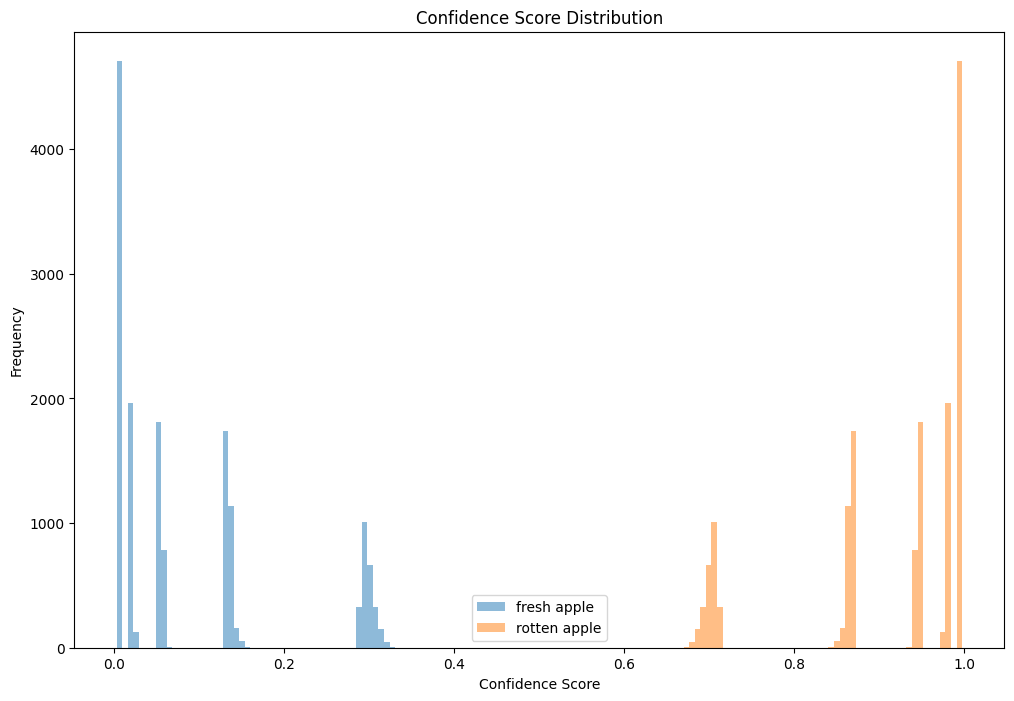

In [ ]:
import os
import json
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Ground Truth 파일 경로
coco_gt_files = {
    "fresh apple": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/fresh apple/fresh_apple_test_annotation_coco.json',
    "fresh banana": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/fresh banana/fresh_banana_test_annotation_coco.json',
    "fresh orange": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/fresh orange/fresh_orange_test_annotation_coco.json',
    "rotten apple": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten apple/rotten_apple_test_annotation_coco.json',
    "rotten banana": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten banana/rotten_banana_test_annotation_coco.json',
    "rotten orange": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten orange/rotten_orange_test_annotation_coco.json'
}

# 평균과 표준편차 파일 경로
mean_std_files = {
    'fresh apple': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/fresh_apple_mean_std.json',
    'fresh banana': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh banana/fresh_banana_mean_std.json',
    'fresh orange': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh orange/fresh_orange_mean_std.json',
    'rotten apple': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten apple/rotten_apple_mean_std.json',
    'rotten banana': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten banana/rotten_banana_mean_std.json',
    'rotten orange': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten orange/rotten_orange_mean_std.json'
}

# COCO 형식의 바운딩 박스 변환 함수
def convert_bbox_coco_format(bbox):
    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height
    return [xmin, ymin, xmax, ymax]

# 커스텀 데이터셋 정의
class FruitImageDataset(Dataset):
    def __init__(self, images_dir, annotations_file, mean, std, transforms=None):
        self.images_dir = images_dir
        self.transforms = transforms
        self.mean = mean
        self.std = std
        with open(annotations_file, 'r') as f:
            coco = json.load(f)
        self.images = coco['images']
        self.annotations = {ann['image_id']: ann for ann in coco['annotations']}

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_info = self.images[idx]
        img_path = os.path.join(self.images_dir, image_info['file_name'])
        image = Image.open(img_path).convert("RGB")

        ann = self.annotations.get(image_info['id'], None)
        if ann is None:
            return None, None

        bbox = convert_bbox_coco_format(ann['bbox'])
        boxes = torch.tensor([bbox], dtype=torch.float32)
        labels = torch.tensor([ann['category_id']], dtype=torch.int64)

        if self.transforms:
            image = self.transforms(image)

        target = {
            'bbox': boxes,
            'cls': labels,
            'image_id': torch.tensor([image_info['id']])
        }

        return image, target

# 모델 설정 (이전에 학습된 모델 로드)
config = get_efficientdet_config('tf_efficientdet_d0')
config.num_classes = 6
config.image_size = (512, 512)
model = EfficientDet(config, pretrained_backbone=False)
model.class_net = HeadNet(config, num_outputs=config.num_classes)
model = DetBenchPredict(model)
model.load_state_dict(torch.load('/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/saved_models/efficientdet_d0_early_stopped_while_training.pth'))
model.to('cuda')
model.eval()

# collate_fn 함수 정의
def collate_fn(batch):
    batch = list(filter(lambda x: x[0] is not None, batch))
    images, targets = zip(*batch)
    images = torch.stack(images, dim=0)
    return images, targets

# Class names and corresponding category ids
class_names = {
    1: 'fresh apple',
    2: 'rotten apple',
    3: 'fresh banana',
    4: 'rotten banana',
    5: 'fresh orange',
    6: 'rotten orange'
}

# Confidence Score Distribution 시각화
all_scores = {class_idx: [] for class_idx in range(1, len(class_names) + 1)}

# 각 카테고리별 데이터 수집
for category, coco_gt_file in coco_gt_files.items():
    test_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test'

    with open(mean_std_files[category], 'r') as f:
        mean_std = json.load(f)
        mean = mean_std['mean']
        std = mean_std['std']

    val_transform = transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

    dataset = FruitImageDataset(f'{test_dir}/{category}', coco_gt_file, mean, std, transforms=val_transform)
    loader = DataLoader(dataset, batch_size=8, shuffle=False, num_workers=4, collate_fn=collate_fn)

    with torch.no_grad():
        for images, targets in loader:
            images = images.to('cuda')
            outputs = model(images)

            for output in outputs:
                scores = torch.softmax(output[:, 4:], dim=1).cpu().numpy()

                # 각 클래스별로 Confidence Score 수집
                for class_idx in range(1, scores.shape[1] + 1):  # 수정된 부분: scores.shape[1]을 기준으로 반복
                    all_scores[class_idx].extend(scores[:, class_idx - 1])

# Confidence Score Distribution 시각화
plt.figure(figsize=(12, 8))
for class_idx in range(1, len(class_names) + 1):
    if len(all_scores[class_idx]) > 0:  # 추가: 해당 클래스의 스코어가 있는지 확인
        plt.hist(all_scores[class_idx], bins=50, alpha=0.5, label=class_names[class_idx])

plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.title('Confidence Score Distribution')
plt.legend()
plt.show()

### **2.2.2 오차 행렬(Confusion Matrix) 생성**

In [2]:
import os
import json
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 800x600 with 0 Axes>

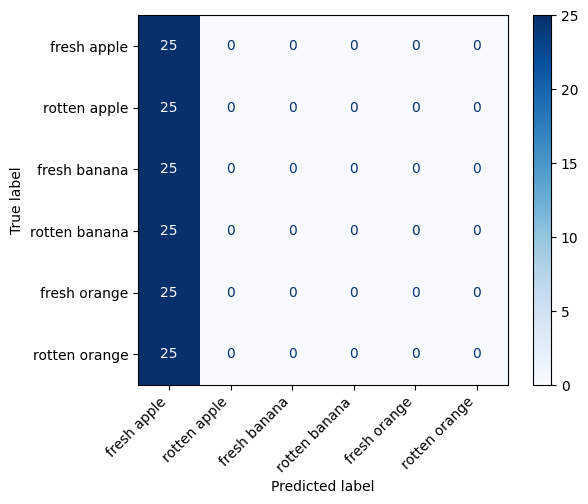

In [ ]:
import os
import json
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ground Truth 파일 경로
coco_gt_files = {
    "fresh apple": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/fresh apple/fresh_apple_test_annotation_coco.json',
    "fresh banana": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/fresh banana/fresh_banana_test_annotation_coco.json',
    "fresh orange": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/fresh orange/fresh_orange_test_annotation_coco.json',
    "rotten apple": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten apple/rotten_apple_test_annotation_coco.json',
    "rotten banana": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten banana/rotten_banana_test_annotation_coco.json',
    "rotten orange": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten orange/rotten_orange_test_annotation_coco.json'
}

# 평균과 표준편차 파일 경로
mean_std_files = {
    'fresh apple': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/fresh_apple_mean_std.json',
    'fresh banana': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh banana/fresh_banana_mean_std.json',
    'fresh orange': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh orange/fresh_orange_mean_std.json',
    'rotten apple': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten apple/rotten_apple_mean_std.json',
    'rotten banana': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten banana/rotten_banana_mean_std.json',
    'rotten orange': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten orange/rotten_orange_mean_std.json'
}

# COCO 형식의 바운딩 박스 변환 함수
def convert_bbox_coco_format(bbox):
    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height
    return [xmin, ymin, xmax, ymax]

# 커스텀 데이터셋 정의
class FruitImageDataset(Dataset):
    def __init__(self, images_dir, annotations_file, mean, std, transforms=None):
        self.images_dir = images_dir
        self.transforms = transforms
        self.mean = mean
        self.std = std
        with open(annotations_file, 'r') as f:
            coco = json.load(f)
        self.images = coco['images']
        self.annotations = {ann['image_id']: ann for ann in coco['annotations']}

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_info = self.images[idx]
        img_path = os.path.join(self.images_dir, image_info['file_name'])
        image = Image.open(img_path).convert("RGB")

        ann = self.annotations.get(image_info['id'], None)
        if ann is None:
            return None, None

        bbox = convert_bbox_coco_format(ann['bbox'])
        boxes = torch.tensor([bbox], dtype=torch.float32)
        labels = torch.tensor([ann['category_id']], dtype=torch.int64)

        if self.transforms:
            image = self.transforms(image)

        target = {
            'bbox': boxes,
            'cls': labels,
            'image_id': torch.tensor([image_info['id']])
        }

        return image, target

# 모델 설정 (이전에 학습된 모델 로드)
config = get_efficientdet_config('tf_efficientdet_d0')
config.num_classes = 6
config.image_size = (512, 512)
model = EfficientDet(config, pretrained_backbone=False)
model.class_net = HeadNet(config, num_outputs=config.num_classes)
model = DetBenchPredict(model)
model.load_state_dict(torch.load('/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/saved_models/efficientdet_d0_early_stopped_while_training.pth'))
model.to('cuda')
model.eval()

# collate_fn 함수 정의
def collate_fn(batch):
    batch = list(filter(lambda x: x[0] is not None, batch))
    images, targets = zip(*batch)
    images = torch.stack(images, dim=0)
    return images, targets

# Class names and corresponding category ids
class_names = {
    1: 'fresh apple',
    2: 'rotten apple',
    3: 'fresh banana',
    4: 'rotten banana',
    5: 'fresh orange',
    6: 'rotten orange'
}

true_labels = []
pred_labels = []

# 각 카테고리별 데이터 수집
for category, coco_gt_file in coco_gt_files.items():
    test_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test'

    with open(mean_std_files[category], 'r') as f:
        mean_std = json.load(f)
        mean = mean_std['mean']
        std = mean_std['std']

    val_transform = transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

    dataset = FruitImageDataset(f'{test_dir}/{category}', coco_gt_file, mean, std, transforms=val_transform)
    loader = DataLoader(dataset, batch_size=8, shuffle=False, num_workers=4, collate_fn=collate_fn)

    with torch.no_grad():
        for images, targets in loader:
            images = images.to('cuda')
            outputs = model(images)

            for i, output in enumerate(outputs):
                # 예측 라벨과 그 신뢰도를 계산
                scores = torch.softmax(output[:, 4:], dim=1)
                max_score, max_idx = torch.max(scores, dim=0)  # 수정: max 함수로 최대 신뢰도를 가진 예측을 선택
                selected_pred_label = torch.argmax(max_score).cpu().item()  # 해당 신뢰도를 가진 클래스를 선택

                true_label = targets[i]['cls'].cpu().numpy()

                if len(true_label) == 1:  # true_label이 하나만 있는 경우
                    pred_labels.append(selected_pred_label)
                    true_labels.extend(true_label)
                else:
                    print(f"Warning: Multiple true labels found for a single image. Skipping this sample.")

# 오차 행렬 생성
cm = confusion_matrix(true_labels, pred_labels, labels=[1, 2, 3, 4, 5, 6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_names.values()))

# 오차 행렬 시각화
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')
plt.show()

### **2.2.2 클래스 별 평가 지표 생성**

<Figure size 800x600 with 0 Axes>

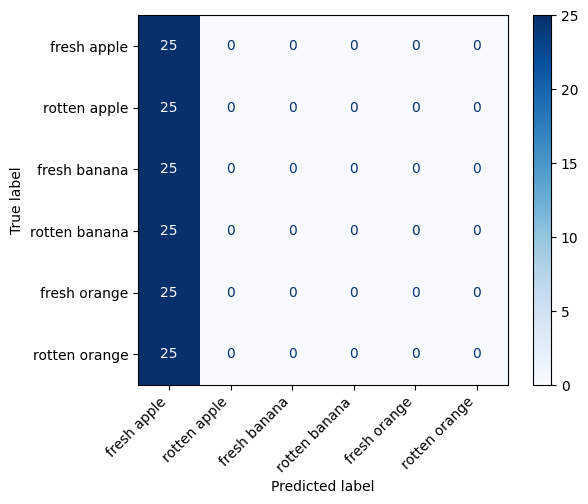

               precision    recall  f1-score   support

  fresh apple       0.17      1.00      0.29        25
 rotten apple       0.00      0.00      0.00        25
 fresh banana       0.00      0.00      0.00        25
rotten banana       0.00      0.00      0.00        25
 fresh orange       0.00      0.00      0.00        25
rotten orange       0.00      0.00      0.00        25

     accuracy                           0.17       150
    macro avg       0.03      0.17      0.05       150
 weighted avg       0.03      0.17      0.05       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
import os
import json
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Ground Truth 파일 경로
coco_gt_files = {
    "fresh apple": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/fresh apple/fresh_apple_test_annotation_coco.json',
    "fresh banana": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/fresh banana/fresh_banana_test_annotation_coco.json',
    "fresh orange": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/fresh orange/fresh_orange_test_annotation_coco.json',
    "rotten apple": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten apple/rotten_apple_test_annotation_coco.json',
    "rotten banana": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten banana/rotten_banana_test_annotation_coco.json',
    "rotten orange": '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test/rotten orange/rotten_orange_test_annotation_coco.json'
}

# 평균과 표준편차 파일 경로
mean_std_files = {
    'fresh apple': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh apple/fresh_apple_mean_std.json',
    'fresh banana': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh banana/fresh_banana_mean_std.json',
    'fresh orange': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/fresh orange/fresh_orange_mean_std.json',
    'rotten apple': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten apple/rotten_apple_mean_std.json',
    'rotten banana': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten banana/rotten_banana_mean_std.json',
    'rotten orange': '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/train/rotten orange/rotten_orange_mean_std.json'
}

# COCO 형식의 바운딩 박스 변환 함수
def convert_bbox_coco_format(bbox):
    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height
    return [xmin, ymin, xmax, ymax]

# 커스텀 데이터셋 정의
class FruitImageDataset(Dataset):
    def __init__(self, images_dir, annotations_file, mean, std, transforms=None):
        self.images_dir = images_dir
        self.transforms = transforms
        self.mean = mean
        self.std = std
        with open(annotations_file, 'r') as f:
            coco = json.load(f)
        self.images = coco['images']
        self.annotations = {ann['image_id']: ann for ann in coco['annotations']}

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_info = self.images[idx]
        img_path = os.path.join(self.images_dir, image_info['file_name'])
        image = Image.open(img_path).convert("RGB")

        ann = self.annotations.get(image_info['id'], None)
        if ann is None:
            return None, None

        bbox = convert_bbox_coco_format(ann['bbox'])
        boxes = torch.tensor([bbox], dtype=torch.float32)
        labels = torch.tensor([ann['category_id']], dtype=torch.int64)

        if self.transforms:
            image = self.transforms(image)

        target = {
            'bbox': boxes,
            'cls': labels,
            'image_id': torch.tensor([image_info['id']])
        }

        return image, target

# 모델 설정 (이전에 학습된 모델 로드)
config = get_efficientdet_config('tf_efficientdet_d0')
config.num_classes = 6
config.image_size = (512, 512)
model = EfficientDet(config, pretrained_backbone=False)
model.class_net = HeadNet(config, num_outputs=config.num_classes)
model = DetBenchPredict(model)
model.load_state_dict(torch.load('/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/saved_models/efficientdet_d0_early_stopped_while_training.pth'))
model.to('cuda')
model.eval()

# collate_fn 함수 정의
def collate_fn(batch):
    batch = list(filter(lambda x: x[0] is not None, batch))
    images, targets = zip(*batch)
    images = torch.stack(images, dim=0)
    return images, targets

# Class names and corresponding category ids
class_names = {
    1: 'fresh apple',
    2: 'rotten apple',
    3: 'fresh banana',
    4: 'rotten banana',
    5: 'fresh orange',
    6: 'rotten orange'
}

true_labels = []
pred_labels = []

# 각 카테고리별 데이터 수집
for category, coco_gt_file in coco_gt_files.items():
    test_dir = '/content/drive/MyDrive/fruit_image_dataset/adjusted_dataset/test'

    with open(mean_std_files[category], 'r') as f:
        mean_std = json.load(f)
        mean = mean_std['mean']
        std = mean_std['std']

    val_transform = transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])

    dataset = FruitImageDataset(f'{test_dir}/{category}', coco_gt_file, mean, std, transforms=val_transform)
    loader = DataLoader(dataset, batch_size=8, shuffle=False, num_workers=4, collate_fn=collate_fn)

    with torch.no_grad():
        for images, targets in loader:
            images = images.to('cuda')
            outputs = model(images)

            for i, output in enumerate(outputs):
                # 예측 라벨과 그 신뢰도를 계산
                scores = torch.softmax(output[:, 4:], dim=1)
                max_score, max_idx = torch.max(scores, dim=0)  # 수정: max 함수로 최대 신뢰도를 가진 예측을 선택
                selected_pred_label = torch.argmax(max_score).cpu().item()  # 해당 신뢰도를 가진 클래스를 선택

                true_label = targets[i]['cls'].cpu().numpy()

                if len(true_label) == 1:  # true_label이 하나만 있는 경우
                    pred_labels.append(selected_pred_label)
                    true_labels.extend(true_label)
                else:
                    print(f"Warning: Multiple true labels found for a single image. Skipping this sample.")

# 오차 행렬 생성
cm = confusion_matrix(true_labels, pred_labels, labels=[1, 2, 3, 4, 5, 6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_names.values()))

# 오차 행렬 시각화
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')
plt.show()

# 클래스별 평가 지표 생성 및 출력
report = classification_report(true_labels, pred_labels, target_names=list(class_names.values()), labels=[1, 2, 3, 4, 5, 6])
print(report)